In [34]:
using Optim
using Distributions
using PyPlot

In [22]:
all = read("two_unfair_fake", String)

"01020021201201020102100201020102012001200122211212002102102010210201010020002110201020102012012001001201012010200201020102001201201201020120102210021021020\n"

In [23]:
n = Dict()
n['0'] = 0
n['1'] = 0
n['2'] = 0
n

Dict{Any,Any} with 3 entries:
  '0' => 0
  '1' => 0
  '2' => 0

In [24]:
for c in all
    if c in keys(n)
        n[c] = n[c] + 1
    else
        println("invalid character:", c)
    end
end

invalid character:



In [25]:
n

Dict{Any,Any} with 3 entries:
  '0' => 69
  '1' => 42
  '2' => 44

In [26]:
function prob(observed_data, model_parameter)
    n0 = observed_data[1]
    n1 = observed_data[2]
    n2 = observed_data[3]
    N = n0 + n1 + n2
    
    p1 = model_parameter[1]
    p2 = model_parameter[2]
    
    return pdf(Multinomial(N, [(1-p1)*(1-p2), (1-p1)*p2 + (1-p2)*p1, p1*p2 ]), [n0, n1, n2])
end

prob (generic function with 1 method)

In [27]:
observed_data = [n['0'], n['1'], n['2']]
# observed_data = [10, 30, 80]


p1s = 0 : 0.05 : 1
p2s = 0 : 0.05 : 1
probxy = [(prob(observed_data, [p1, p2])) for p1 in p1s, p2 in p2s]

21×21 Array{Float64,2}:
 0.0  0.0          0.0          …  0.0           0.0           0.0
 0.0  2.36746e-91  1.18139e-72     2.12759e-63   3.31353e-82   0.0
 0.0  1.18139e-72  1.91243e-56     1.21411e-52   1.64101e-71   0.0
 0.0  1.55387e-61  9.48594e-47     1.61153e-47   1.86201e-66   0.0
 0.0  6.97237e-54  5.06776e-40     8.46457e-45   8.21451e-64   0.0
 0.0  2.70921e-48  4.41659e-35  …  1.75408e-43   1.40032e-62   0.0
 0.0  4.10848e-44  2.21116e-31     3.86624e-43   2.47695e-62   0.0
 0.0  5.4777e-41   1.2541e-28      1.48529e-43   7.41232e-63   0.0
 0.0  1.02868e-38  1.19386e-26     1.2835e-44    4.81174e-64   0.0
 0.0  3.59035e-37  2.39669e-25     2.8071e-46    7.55912e-66   0.0
 0.0  2.7079e-36   1.14224e-24  …  1.59109e-48   2.90933e-68   0.0
 0.0  4.66184e-36  1.33526e-24     2.21205e-51   2.55589e-71   0.0
 0.0  1.77362e-36  3.64902e-25     6.5858e-55    4.37682e-75   0.0
 0.0  1.31118e-37  2.02647e-26     3.32e-59      1.11847e-79   0.0
 0.0  1.45659e-39  1.75361e-28     1.9

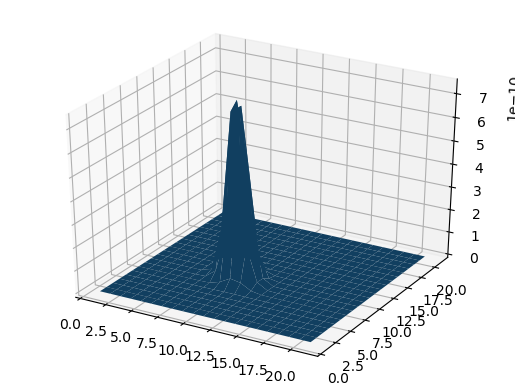

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7fd8fba10ed0>

In [28]:
surf(probxy)

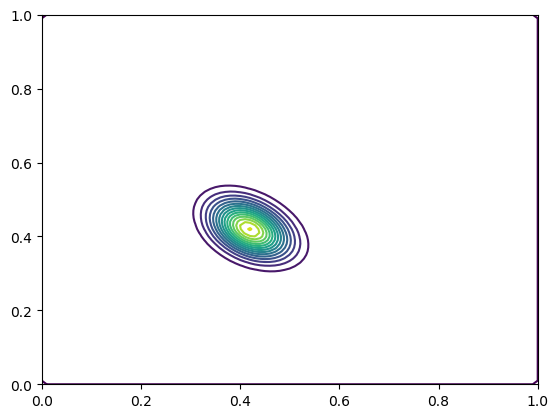

PyObject <matplotlib.contour.QuadContourSet object at 0x7fd8fdde1dd0>

In [29]:
px = Float64[]
py = Float64[]
pz = Float64[]

p1s = 0 : 0.01 : 1
p2s = 0 : 0.01 : 1

for p1 in p1s
    for p2 in p2s
        push!(px, p1)
        push!(py, p2)
        push!(pz, (prob(observed_data, [p1, p2])))
    end
end

px = reshape(px, (length(p2s), length(p1s)))
py = reshape(py, (length(p2s), length(p1s)))
pz = reshape(pz, (length(p2s), length(p1s)))

contour(px, py, pz, levels = 15)

In [30]:
res = optimize(p -> -(prob(observed_data, p)),  [0.5,0.5])

 * Status: success

 * Candidate solution
    Minimizer: [5.00e-01, 5.00e-01]
    Minimum:   -1.579917e-11

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [5.00e-01, 5.00e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    0
    f(x) calls:    5


In [31]:
res = optimize(p -> -log(prob(observed_data, p)), [0.5,0.5])

 * Status: success

 * Candidate solution
    Minimizer: [4.19e-01, 4.19e-01]
    Minimum:   2.082114e+01

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [5.00e-01, 5.00e-01]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    34
    f(x) calls:    70


In [32]:
res = optimize(p -> -log(prob(observed_data, p)), [0.0, 0.0], [1.0, 1.0], [0.5,0.5])

 * Status: success

 * Candidate solution
    Minimizer: [4.19e-01, 4.19e-01]
    Minimum:   2.082114e+01

 * Found with
    Algorithm:     Fminbox with L-BFGS
    Initial Point: [5.00e-01, 5.00e-01]

 * Convergence measures
    |x - x'|               = 1.84e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.10e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 8.53e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.10e-15 ≰ 0.0e+00
    |g(x)|                 = 8.21e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    40
    ∇f(x) calls:   40


In [33]:
Optim.minimizer(res)

2-element Array{Float64,1}:
 0.4193548387252955
 0.4193548387252955